## An example of a diffusion network

#### First, import required modules  and load the data

In [1]:
import matplotlib as mpl
import matplotlib.patches
import matplotlib.pyplot as plt
import networkx as nx 
import numpy
import numpy as np
%matplotlib inline

with open('../data/data2.csv', 'r') as f:
    rt_time = []
    for line in f:
        time= line.strip().split(',')[-1]
        print('\ntime: ')
        print (time)
        
        day = time[0:4] + time[5:7] + time[8:10]
        print('\nday: ')
        print (day)
       
        #hms= time[9:17].replace(':', '')
        hm = time[11:16].replace(':','')
        time = int(day + hm)
        print('\ntime: ')
        print(time)

        rt_time.append(time)



time: 
2020-01-14 16:17'

day: 
20200114

time: 
202001141617

time: 
2020-01-14 16:19'

day: 
20200114

time: 
202001141619

time: 
2020-01-14 16:19'

day: 
20200114

time: 
202001141619

time: 
2020-01-15 19:22'

day: 
20200115

time: 
202001151922

time: 
2020-01-16 08:58'

day: 
20200116

time: 
202001160858

time: 
2020-01-16 20:31'

day: 
20200116

time: 
202001162031


#### Next, count the time lag and convert into a graph

In [2]:
array = numpy.array(rt_time)
order = array.argsort()
ranks = order.argsort()
G = nx.DiGraph()

#### Compute a few metrics, like degree, closeness, betweenness, and shortest path length

In [3]:
with open('../data/data2.csv', 'r') as f:
    for position, line in enumerate(f):
        uid, rtuid= line.strip().split(',')[:-1]
        G.add_edge(uid, rtuid, time = ranks[position])
        
edges,colors = zip(*nx.get_edge_attributes(G,'time').items())
G = G.to_directed()

# Edges
print('Edges: ')
print(edges)

print('Number of Edges: ')
print (G.number_of_edges()) 

# Degree
degree = G.degree() 
print('Degree: ')
print(degree)

# SPL
path_length = nx.all_pairs_shortest_path_length(G)

# Closeness
closenesss = nx.closeness_centrality(G)

# Betweenness
betweenness = nx.betweenness_centrality(G)

Edges: 
(('name=Tom', 'name=CDCGOV'), ('name=Alice', 'name=CDCGOV'), ('name=Mike', 'name=CDCGOV'), ('name=Sue', 'name=Alice'), ('name=Dan', 'name=Alice'), ('name=Lisa', 'name=Alice'))
Number of Edges: 
6
Degree: 
{'name=Tom': 1, 'name=CDCGOV': 3, 'name=Alice': 4, 'name=Mike': 1, 'name=Sue': 1, 'name=Dan': 1, 'name=Lisa': 1}


### Plot the graph

AttributeError: module 'matplotlib.pyplot' has no attribute 'ishold'

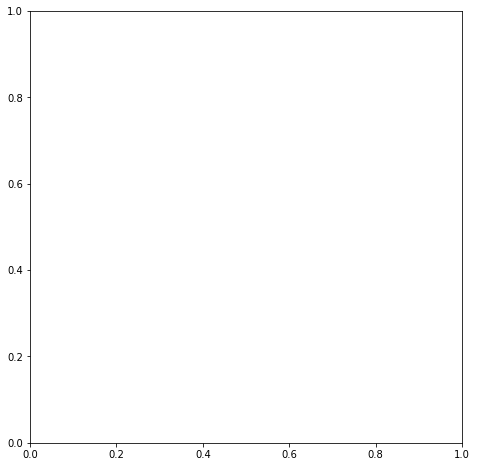

In [15]:
pos = nx.spring_layout(G) #set up a network

fig = plt.figure(figsize=(6, 6), facecolor='white')

nx.draw(G, pos, 
       # nodelist    = list(dict(G.degree).keys()),
       # node_size   = [v*40 for v in dict(G.degree).values()], 
        node_color  = 'red',         
        node_shape  = 'o', 
        cmap        = plt.cm.gray,
        edgelist    = edges, 
        edge_color  = 'gray', 
        width       = 1.0,
        with_labels = True, 
        arrows      = True, 
        arrowstyle  = '->'
       )

plt.title("A twitter social network")
plt.show()